<a href="https://colab.research.google.com/github/GiX007/llm-from-scratch/blob/main/01_working_with_text_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical NLP Preprocessing Workflow

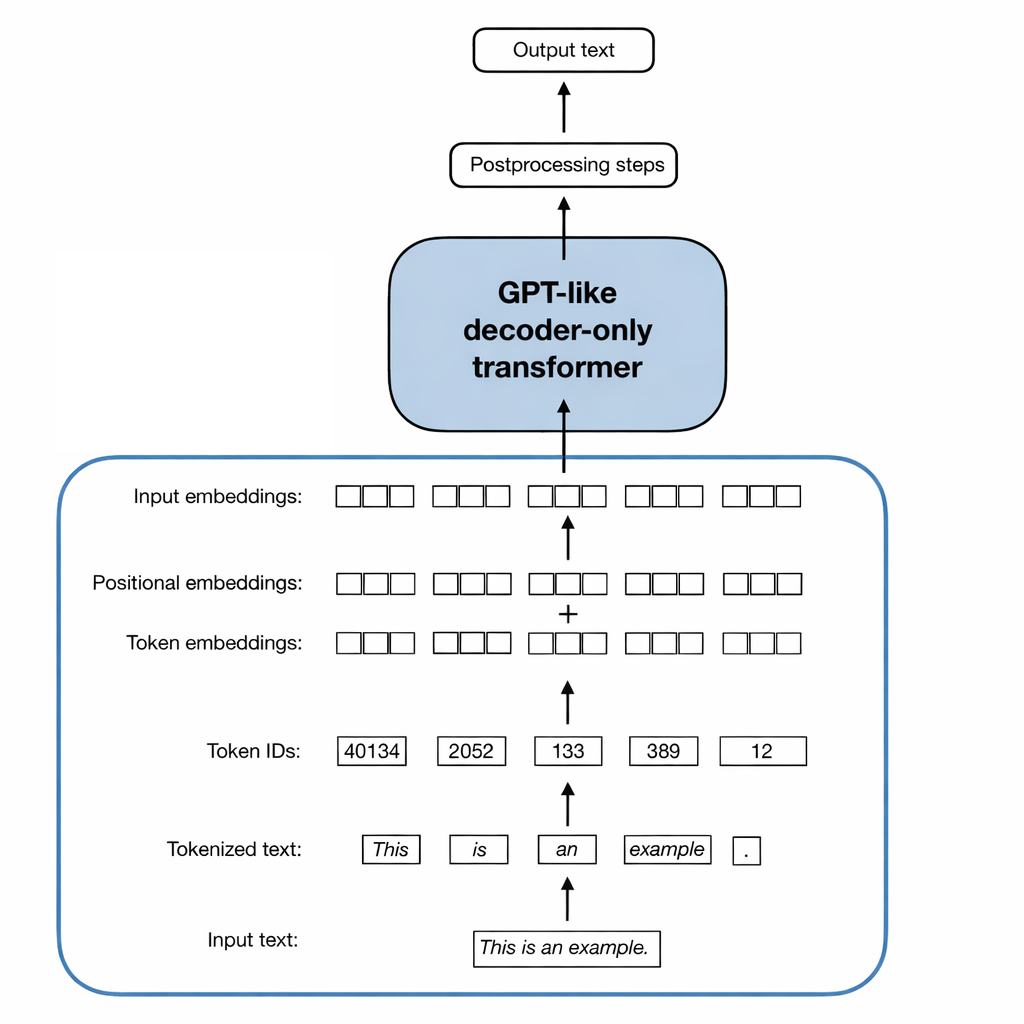

## Get the dataset

In [ ]:
file_path = "/content/the-verdict.txt"

In [ ]:
# dataset: https://en.wikisource.org/wiki/The_Verdict
with open(file_path, 'r') as file:
  raw_text = file.read()
print(raw_text)

I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no great surprise to me to hear that, in the height of his glory, he had dropped his painting, married a rich widow, and established himself in a villa on the Riviera. (Though I rather thought it would have been Rome or Florence.)

"The height of his glory"--that was what the women called it. I can hear Mrs. Gideon Thwing--his last Chicago sitter--deploring his unaccountable abdication. "Of course it's going to send the value of my picture 'way up; but I don't think of that, Mr. Rickham--the loss to Arrt is all I think of." The word, on Mrs. Thwing's lips, multiplied its _rs_ as though they were reflected in an endless vista of mirrors. And it was not only the Mrs. Thwings who mourned. Had not the exquisite Hermia Croft, at the last Grafton Gallery show, stopped me before Gisburn's "Moon-dancers" to say, with tears in her eyes: "We shall not look upon its like again"?

Well!--even through th

In [ ]:
len(raw_text)

20479

## Tokenization

In [ ]:
import re

In [ ]:
# example 1
text = "Hallo, world. This is a test!"
result = re.split(r'(\s)', text)

print(result)

['Hallo,', ' ', 'world.', ' ', 'This', ' ', 'is', ' ', 'a', ' ', 'test!']


In [ ]:
# seprate '.', ',', '!' tokens
result = re.split(r'([,.!]|\s)', text)
print(result)

['Hallo', ',', '', ' ', 'world', '.', '', ' ', 'This', ' ', 'is', ' ', 'a', ' ', 'test', '!', '']


In [ ]:
# get rid of space characters
result = [item for item in result if item.strip()]
print(result)

['Hallo', ',', 'world', '.', 'This', 'is', 'a', 'test', '!']


In [ ]:
# example 2
text = "Hello, world. Is this-- a test?"

result = re.split(r'([,.:;?_!"()\']|--|\s)', text)
result = [item.strip() for item in result if item.strip()]
print(result)

['Hello', ',', 'world', '.', 'Is', 'this', '--', 'a', 'test', '?']


In [ ]:
# tokenize the dataset (explore tokenization with: https://tiktokenizer.vercel.app/)
preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', raw_text) # goal: get all the uique words of the dataset
preprocessed = [item.strip() for item in preprocessed if item.strip()]
print(preprocessed)

['I', 'HAD', 'always', 'thought', 'Jack', 'Gisburn', 'rather', 'a', 'cheap', 'genius', '--', 'though', 'a', 'good', 'fellow', 'enough', '--', 'so', 'it', 'was', 'no', 'great', 'surprise', 'to', 'me', 'to', 'hear', 'that', ',', 'in', 'the', 'height', 'of', 'his', 'glory', ',', 'he', 'had', 'dropped', 'his', 'painting', ',', 'married', 'a', 'rich', 'widow', ',', 'and', 'established', 'himself', 'in', 'a', 'villa', 'on', 'the', 'Riviera', '.', '(', 'Though', 'I', 'rather', 'thought', 'it', 'would', 'have', 'been', 'Rome', 'or', 'Florence', '.', ')', '"', 'The', 'height', 'of', 'his', 'glory', '"', '--', 'that', 'was', 'what', 'the', 'women', 'called', 'it', '.', 'I', 'can', 'hear', 'Mrs', '.', 'Gideon', 'Thwing', '--', 'his', 'last', 'Chicago', 'sitter', '--', 'deploring', 'his', 'unaccountable', 'abdication', '.', '"', 'Of', 'course', 'it', "'", 's', 'going', 'to', 'send', 'the', 'value', 'of', 'my', 'picture', "'", 'way', 'up', ';', 'but', 'I', 'don', "'", 't', 'think', 'of', 'that', ',

In [ ]:
print(len(preprocessed))

4690


## Converting tokens into token IDs

In [ ]:
# get all words of the dataset
all_words = sorted(set(preprocessed)) # with 'set', we get rid of duplicates
print(all_words)

['!', '"', "'", '(', ')', ',', '--', '.', ':', ';', '?', 'A', 'Ah', 'Among', 'And', 'Are', 'Arrt', 'As', 'At', 'Be', 'Begin', 'Burlington', 'But', 'By', 'Carlo', 'Chicago', 'Claude', 'Come', 'Croft', 'Destroyed', 'Devonshire', 'Don', 'Dubarry', 'Emperors', 'Florence', 'For', 'Gallery', 'Gideon', 'Gisburn', 'Gisburns', 'Grafton', 'Greek', 'Grindle', 'Grindles', 'HAD', 'Had', 'Hang', 'Has', 'He', 'Her', 'Hermia', 'His', 'How', 'I', 'If', 'In', 'It', 'Jack', 'Jove', 'Just', 'Lord', 'Made', 'Miss', 'Money', 'Monte', 'Moon-dancers', 'Mr', 'Mrs', 'My', 'Never', 'No', 'Now', 'Nutley', 'Of', 'Oh', 'On', 'Once', 'Only', 'Or', 'Perhaps', 'Poor', 'Professional', 'Renaissance', 'Rickham', 'Riviera', 'Rome', 'Russian', 'Sevres', 'She', 'Stroud', 'Strouds', 'Suddenly', 'That', 'The', 'Then', 'There', 'They', 'This', 'Those', 'Though', 'Thwing', 'Thwings', 'To', 'Usually', 'Venetian', 'Victor', 'Was', 'We', 'Well', 'What', 'When', 'Why', 'Yes', 'You', '_', 'a', 'abdication', 'able', 'about', 'above',

In [ ]:
vocab_size = len(all_words)
print(vocab_size)

1130


In [ ]:
# create a vocab
vocab = {word: index for index, word in enumerate(all_words)}
print(vocab)

{'!': 0, '"': 1, "'": 2, '(': 3, ')': 4, ',': 5, '--': 6, '.': 7, ':': 8, ';': 9, '?': 10, 'A': 11, 'Ah': 12, 'Among': 13, 'And': 14, 'Are': 15, 'Arrt': 16, 'As': 17, 'At': 18, 'Be': 19, 'Begin': 20, 'Burlington': 21, 'But': 22, 'By': 23, 'Carlo': 24, 'Chicago': 25, 'Claude': 26, 'Come': 27, 'Croft': 28, 'Destroyed': 29, 'Devonshire': 30, 'Don': 31, 'Dubarry': 32, 'Emperors': 33, 'Florence': 34, 'For': 35, 'Gallery': 36, 'Gideon': 37, 'Gisburn': 38, 'Gisburns': 39, 'Grafton': 40, 'Greek': 41, 'Grindle': 42, 'Grindles': 43, 'HAD': 44, 'Had': 45, 'Hang': 46, 'Has': 47, 'He': 48, 'Her': 49, 'Hermia': 50, 'His': 51, 'How': 52, 'I': 53, 'If': 54, 'In': 55, 'It': 56, 'Jack': 57, 'Jove': 58, 'Just': 59, 'Lord': 60, 'Made': 61, 'Miss': 62, 'Money': 63, 'Monte': 64, 'Moon-dancers': 65, 'Mr': 66, 'Mrs': 67, 'My': 68, 'Never': 69, 'No': 70, 'Now': 71, 'Nutley': 72, 'Of': 73, 'Oh': 74, 'On': 75, 'Once': 76, 'Only': 77, 'Or': 78, 'Perhaps': 79, 'Poor': 80, 'Professional': 81, 'Renaissance': 82, 'Ri

In [ ]:
# now, we need to convert the tokens dataset to token ids based on our vocab

# example 1
print(vocab["close"]) # (token 272)

int_to_str = {i:s for s,i in vocab.items()}
print(int_to_str[272]) # (close)

272
close


In [ ]:
class SimpleTokenizerV1:
  def __init__(self, vocab):
    self.str_to_int = vocab
    self.int_to_str = {i:s for s,i in vocab.items()}

  def encode(self, text):
    preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', text)

    preprocessed = [item.strip() for item in preprocessed if item.strip()]
    ids = [self.str_to_int[s] for s in preprocessed] # create ids
    return ids

  def decode(self, ids):
    text = " ".join([self.int_to_str[i] for i in ids])
    # replace spaces before the specified punctuations
    text = re.sub(r'\s+([,.?!"()\'])', r'\1', text)
    return text

In [ ]:
# example 2
tokenizer = SimpleTokenizerV1(vocab)

text = """"It's the last he painted, you know,"
           Mrs. Gisburn said with pardonable pride."""

# convert text to token ids
ids = tokenizer.encode(text)
print(ids)

# convert token ids back to text
dec = tokenizer.decode(ids)
print(dec)

[1, 56, 2, 850, 988, 602, 533, 746, 5, 1126, 596, 5, 1, 67, 7, 38, 851, 1108, 754, 793, 7]
" It' s the last he painted, you know," Mrs. Gisburn said with pardonable pride.


## Adding special tokens

In [ ]:
# example 1
tokenizer = SimpleTokenizerV1(vocab)

text = "Hello, do you like tea. Is this-- a test?"

tokenizer.encode(text) # wait for an error, as 'Hello' is not included in the vocab

KeyError: 'Hello'

In [ ]:
# extend all tokens to include 'unknown word' and 'end of text' special tokens
all_tokens = sorted(list(set(preprocessed)))
all_tokens.extend(["<|endoftext|>", "<|unk|>"])

# update the vocab
vocab = {token:integer for integer,token in enumerate(all_tokens)}

In [ ]:
# sanity check of length (previously we had 1130)
print(len(vocab.items()))

1132


In [ ]:
for i, item in enumerate(list(vocab.items())[-5:]):
  print(item)

('younger', 1127)
('your', 1128)
('yourself', 1129)
('<|endoftext|>', 1130)
('<|unk|>', 1131)


In [ ]:
# update our tokenizer to use these special tokens
class SimpleTokenizerV2:
  def __init__(self, vocab):
    self.str_to_int = vocab
    self.int_to_str = { i:s for s,i in vocab.items()}

  def encode(self, text):
    preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', text)
    preprocessed = [item.strip() for item in preprocessed if item.strip()]
    preprocessed = [item if item in self.str_to_int else "<|unk|>" for item in preprocessed] # handle unkown words

    ids = [self.str_to_int[s] for s in preprocessed]
    return ids

  def decode(self, ids):
    text = " ".join([self.int_to_str[i] for i in ids])
    # replace spaces before the specified punctuations
    text = re.sub(r'\s+([,.:;?!"()\'])', r'\1', text)
    return text

In [ ]:
# test now with the new tokenizer the previous same sentence
tokenizer = SimpleTokenizerV2(vocab)

tokenizer.encode(text)

[1131, 5, 355, 1126, 628, 975, 7, 1131, 999, 6, 115, 1131, 10]

In [ ]:
# example 2
tokenizer = SimpleTokenizerV2(vocab)

text1 = "Hello, do you like tea?"
text2 = "In the sunlit terraces of the palace."

text = " <|endoftext|> ".join((text1, text2))

print(text)

Hello, do you like tea? <|endoftext|> In the sunlit terraces of the palace.


In [ ]:
tokenizer.encode(text)

[1131, 5, 355, 1126, 628, 975, 10, 1130, 55, 988, 956, 984, 722, 988, 1131, 7]

In [ ]:
tokenizer.decode(tokenizer.encode(text))

'<|unk|>, do you like tea? <|endoftext|> In the sunlit terraces of the <|unk|>.'

## Byte pair encoding

In [ ]:
# mapping every unknown word to the same <|unk|> token loses information. Byte Pair Encoding (BPE) solves this by splitting rare or unseen words into subword units instead of replacing them entirely.
# just try sth like 'unknownword wlkkuughlwerg  wlughkwhkweh' in https://tiktokenizer.vercel.app/
import importlib
import tiktoken

print("tiktoken version:", importlib.metadata.version("tiktoken"))

tiktoken version: 0.12.0


In [ ]:
tokenizer = tiktoken.get_encoding("gpt2")

# inspect the tokenizer
# tokenizer
# dir(tokenizer)
print(tokenizer.n_vocab) # len of tiktoken's tokenizer vocab

50257


In [ ]:
# example 1
text = "Hello, world. I am here!"

integers = tokenizer.encode(text)
print(integers)

strings = tokenizer.decode(integers)
print(dec)

[15496, 11, 995, 13, 314, 716, 994, 0]
Hello, world. I am here!


In [ ]:
# example 2
text = (
    "Hello, do you like tea? <|endoftext|> In the sunlit terraces"
     "of someunknownPlace."
)

# integers = tokenizer.encode(text) # uncomment to run (this leads to error due to '<|endoftext|>')
integers = tokenizer.encode(text, allowed_special={"<|endoftext|>"})
print(integers)

strings = tokenizer.decode(integers)
print(strings)

[15496, 11, 466, 345, 588, 8887, 30, 220, 50256, 554, 262, 4252, 18250, 8812, 2114, 1659, 617, 34680, 27271, 13]
Hello, do you like tea? <|endoftext|> In the sunlit terracesof someunknownPlace.


## Data sampling with a sliding window

In [ ]:
# tokenize our dataset with tiktoken tokenizer
with open("the-verdict.txt", "r", encoding="utf-8") as f:
  raw_text = f.read()

enc_text = tokenizer.encode(raw_text)
print(enc_text)
print(len(enc_text))

[40, 367, 2885, 1464, 1807, 3619, 402, 271, 10899, 2138, 257, 7026, 15632, 438, 2016, 257, 922, 5891, 1576, 438, 568, 340, 373, 645, 1049, 5975, 284, 502, 284, 3285, 326, 11, 287, 262, 6001, 286, 465, 13476, 11, 339, 550, 5710, 465, 12036, 11, 6405, 257, 5527, 27075, 11, 290, 4920, 2241, 287, 257, 4489, 64, 319, 262, 34686, 41976, 13, 357, 10915, 314, 2138, 1807, 340, 561, 423, 587, 10598, 393, 28537, 2014, 198, 198, 1, 464, 6001, 286, 465, 13476, 1, 438, 5562, 373, 644, 262, 1466, 1444, 340, 13, 314, 460, 3285, 9074, 13, 46606, 536, 5469, 438, 14363, 938, 4842, 1650, 353, 438, 2934, 489, 3255, 465, 48422, 540, 450, 67, 3299, 13, 366, 5189, 1781, 340, 338, 1016, 284, 3758, 262, 1988, 286, 616, 4286, 705, 1014, 510, 26, 475, 314, 836, 470, 892, 286, 326, 11, 1770, 13, 8759, 2763, 438, 1169, 2994, 284, 943, 17034, 318, 477, 314, 892, 286, 526, 383, 1573, 11, 319, 9074, 13, 536, 5469, 338, 11914, 11, 33096, 663, 4808, 3808, 62, 355, 996, 484, 547, 12548, 287, 281, 13079, 410, 12523, 286, 

In [ ]:
# use a subset
enc_sample = enc_text[50:]
print(enc_sample)
print(len(enc_sample))

[290, 4920, 2241, 287, 257, 4489, 64, 319, 262, 34686, 41976, 13, 357, 10915, 314, 2138, 1807, 340, 561, 423, 587, 10598, 393, 28537, 2014, 198, 198, 1, 464, 6001, 286, 465, 13476, 1, 438, 5562, 373, 644, 262, 1466, 1444, 340, 13, 314, 460, 3285, 9074, 13, 46606, 536, 5469, 438, 14363, 938, 4842, 1650, 353, 438, 2934, 489, 3255, 465, 48422, 540, 450, 67, 3299, 13, 366, 5189, 1781, 340, 338, 1016, 284, 3758, 262, 1988, 286, 616, 4286, 705, 1014, 510, 26, 475, 314, 836, 470, 892, 286, 326, 11, 1770, 13, 8759, 2763, 438, 1169, 2994, 284, 943, 17034, 318, 477, 314, 892, 286, 526, 383, 1573, 11, 319, 9074, 13, 536, 5469, 338, 11914, 11, 33096, 663, 4808, 3808, 62, 355, 996, 484, 547, 12548, 287, 281, 13079, 410, 12523, 286, 22353, 13, 843, 340, 373, 407, 691, 262, 9074, 13, 536, 48819, 508, 25722, 276, 13, 11161, 407, 262, 40123, 18113, 544, 9325, 701, 11, 379, 262, 938, 402, 1617, 261, 12917, 905, 11, 5025, 502, 878, 402, 271, 10899, 338, 366, 31640, 12, 67, 20811, 1, 284, 910, 11, 351, 10

In [ ]:
# create a chunk: input of size context_size and the output target wil be the same input shifted by one position (as we want to predict the next token each time)
context_size = 4 # (max_length)

x = enc_sample[:context_size]
y = enc_sample[1:context_size+1]

print(f"x: {x}")
print(f"y:      {y}")

x: [290, 4920, 2241, 287]
y:      [4920, 2241, 287, 257]


In [ ]:
# example: the llm receives 290 token and it should predict 4920 token, or receives [290, 4920] and it should predict 2241, etc.
for i in range(1, context_size+1):
  context = enc_sample[:i]
  desired = enc_sample[i]

  print(context, "---->", desired)

[290] ----> 4920
[290, 4920] ----> 2241
[290, 4920, 2241] ----> 287
[290, 4920, 2241, 287] ----> 257


In [ ]:
for i in range(1, context_size+1):
  context = enc_sample[:i]
  desired = enc_sample[i]

  print(tokenizer.decode(context), "---->", tokenizer.decode([desired]))

 and ---->  established
 and established ---->  himself
 and established himself ---->  in
 and established himself in ---->  a


In [ ]:
# number of sliding-window chunks = N - context_size
# here: N = 5095 and context_size = 4 → 5095 - 4 = 5091 chunks

## Create dataset and dataloader

In [ ]:
import torch
print("PyTorch version:", torch.__version__)

PyTorch version: 2.9.0+cpu


In [ ]:
# create a dataset that extracts chunks from the input text dataset
from torch.utils.data import Dataset, DataLoader

class GPTDatasetV1(Dataset):

  def __init__(self, txt, tokenizer, max_length, stride):
    self.input_ids = []
    self.target_ids = []

    # tokenize the entire text
    token_ids = tokenizer.encode(txt, allowed_special={"<|endoftext|>"})
    assert len(token_ids) > max_length, "Number of tokenized inputs must at least be equal to max_length+1"

    # use a sliding window to chunk the book into overlapping sequences of max_length
    for i in range(0, len(token_ids) - max_length, stride):
      input_chunk = token_ids[i:i + max_length]
      target_chunk = token_ids[i + 1: i + max_length + 1]
      self.input_ids.append(torch.tensor(input_chunk))
      self.target_ids.append(torch.tensor(target_chunk))

  def __len__(self):
    return len(self.input_ids)

  def __getitem__(self, idx):
    return self.input_ids[idx], self.target_ids[idx]

In [ ]:
def create_dataloader_v1(txt, batch_size=4, max_length=256, stride=128, shuffle=True, drop_last=True, num_workers=0):

  # initialize the tokenizer
  tokenizer = tiktoken.get_encoding("gpt2")

  # create dataset
  dataset = GPTDatasetV1(txt, tokenizer, max_length, stride)

  # create dataloader
  dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle, drop_last=drop_last, num_workers=num_workers)

  return dataloader

In [ ]:
# test the dataloader with a batch size of 1 and a context size of 4
with open("the-verdict.txt", "r", encoding="utf-8") as f:
  raw_text = f.read()

dataloader = create_dataloader_v1(raw_text, batch_size=1, max_length=4, stride=1, shuffle=False)

data_iter = iter(dataloader) # create an iter object
first_batch = next(data_iter) # and take the first batch
print(first_batch)

second_batch = next(data_iter) # and take the second batch
print(second_batch)

third_batch = next(data_iter) # and take the third batch
print(third_batch)

[tensor([[  40,  367, 2885, 1464]]), tensor([[ 367, 2885, 1464, 1807]])]
[tensor([[ 367, 2885, 1464, 1807]]), tensor([[2885, 1464, 1807, 3619]])]
[tensor([[2885, 1464, 1807, 3619]]), tensor([[1464, 1807, 3619,  402]])]


In [ ]:
# notice how inputs and targets overlap when using a sliding window -> this creates many redundant samples and for LLM training this is inefficient (increased overfitting), so we move the stride equal to max_len to create non-overlapping chunks and reduce duplicated context while keeping continuous sequences
dataloader = create_dataloader_v1(raw_text, batch_size=1, max_length=4, stride=4, shuffle=False)

data_iter = iter(dataloader)
first_batch = next(data_iter)
print(first_batch)

second_batch = next(data_iter)
print(second_batch)

third_batch = next(data_iter)
print(third_batch)

[tensor([[  40,  367, 2885, 1464]]), tensor([[ 367, 2885, 1464, 1807]])]
[tensor([[1807, 3619,  402,  271]]), tensor([[ 3619,   402,   271, 10899]])]
[tensor([[10899,  2138,   257,  7026]]), tensor([[ 2138,   257,  7026, 15632]])]


In [ ]:
# we also increase the batch size
dataloader = create_dataloader_v1(raw_text, batch_size=8, max_length=4, stride=4, shuffle=False)

data_iter = iter(dataloader)
inputs, targets = next(data_iter)
print("Inputs:\n", inputs)
print("\nTargets:\n", targets)

Inputs:
 tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])

Targets:
 tensor([[  367,  2885,  1464,  1807],
        [ 3619,   402,   271, 10899],
        [ 2138,   257,  7026, 15632],
        [  438,  2016,   257,   922],
        [ 5891,  1576,   438,   568],
        [  340,   373,   645,  1049],
        [ 5975,   284,   502,   284],
        [ 3285,   326,    11,   287]])


## Create token embeddings

In [ ]:
# example input
input_ids = torch.tensor([2, 3, 5, 1])

In [ ]:
# create a dummy embedding layer
vocab_size = 6 # (tiktoken tokenizer has 50257)
output_dim = 3

torch.manual_seed(42)
embedding_layer = torch.nn.Embedding(vocab_size, output_dim) # (6, 3)

In [ ]:
# inspect the embedding layer
# embedding_layer
# dir(embedding_layer)

print(embedding_layer.weight) # during training, these weights are getting optimized

Parameter containing:
tensor([[ 1.9269,  1.4873, -0.4974],
        [ 0.4396, -0.7581,  1.0783],
        [ 0.8008,  1.6806,  0.3559],
        [-0.6866,  0.6105,  1.3347],
        [-0.2316,  0.0418, -0.2516],
        [ 0.8599, -0.3097, -0.3957]], requires_grad=True)


In [ ]:
# test the embedding layer
print(embedding_layer(torch.tensor([3]))) # outputs a tensor vector of (3,)
print()
print(embedding_layer(input_ids)) # outputs a tensor vector of (4, 3)

tensor([[-0.6866,  0.6105,  1.3347]], grad_fn=<EmbeddingBackward0>)

tensor([[ 0.8008,  1.6806,  0.3559],
        [-0.6866,  0.6105,  1.3347],
        [ 0.8599, -0.3097, -0.3957],
        [ 0.4396, -0.7581,  1.0783]], grad_fn=<EmbeddingBackward0>)


In [ ]:
# using the tiktoken tokenizer's vocab
torch.manual_seed(42)
embedding_layer = torch.nn.Embedding(tokenizer.n_vocab, output_dim)

print(embedding_layer.weight) # (20257, 3)
print()
print(embedding_layer(torch.tensor([3]))) # (3,)
print()
print(embedding_layer(input_ids)) # (4, 3)

Parameter containing:
tensor([[ 1.9269,  1.4873,  0.9007],
        [-2.1055,  0.6784, -1.2345],
        [-0.0431, -1.6047, -0.7521],
        ...,
        [ 0.2875,  1.1914,  0.4735],
        [ 0.3121,  2.0992, -0.9541],
        [-0.0232,  0.4189,  0.7707]], requires_grad=True)

tensor([[ 1.6487, -0.3925, -1.4036]], grad_fn=<EmbeddingBackward0>)

tensor([[-0.0431, -1.6047, -0.7521],
        [ 1.6487, -0.3925, -1.4036],
        [ 0.7624,  1.6423, -0.1596],
        [-2.1055,  0.6784, -1.2345]], grad_fn=<EmbeddingBackward0>)


## Encode word positions

In [ ]:
# increase embedding output dim
vocab_size = 50257
output_dim = 256

token_embedding_layer = torch.nn.Embedding(vocab_size, output_dim)

In [ ]:
# recreate a dataloader
max_length = 4
dataloader = create_dataloader_v1(raw_text, batch_size=8, max_length=max_length, stride=max_length, shuffle=False)
data_iter = iter(dataloader)
inputs, targets = next(data_iter)

In [ ]:
print("Token IDs:\n", inputs)
print("\nInputs shape:\n", inputs.shape)

Token IDs:
 tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])

Inputs shape:
 torch.Size([8, 4])


In [ ]:
# convert these ids to embeddings
token_embeddings = token_embedding_layer(inputs)
print(token_embeddings.shape)
print(token_embeddings)

torch.Size([8, 4, 256])
tensor([[[-1.1514, -0.1161,  1.3017,  ..., -0.7145,  0.6069,  0.2544],
         [-0.4331, -0.0530, -1.0083,  ...,  0.8625,  0.0659,  0.1689],
         [ 1.0546,  0.2299,  0.3419,  ...,  0.8610, -0.3825,  0.5364],
         [ 0.6075,  0.4809,  0.4920,  ..., -0.0374,  0.4623, -1.3169]],

        [[-0.4674,  1.6877,  1.4649,  ...,  1.0209,  0.6327, -1.7129],
         [-0.3677, -0.5241,  0.5553,  ..., -0.4198, -1.3092,  1.6451],
         [ 1.8856,  1.7446,  0.0820,  ..., -0.3162, -0.8691, -0.2598],
         [-0.4741,  1.1175,  0.8347,  ..., -1.6261, -0.6100, -1.3724]],

        [[-1.6118, -0.5538, -0.8833,  ..., -0.8499,  2.0294, -1.4241],
         [-0.6526, -0.3444,  3.0970,  ..., -0.1763, -0.8689,  0.3781],
         [-0.6978, -0.6920,  0.0561,  ...,  0.1314, -0.1847,  0.7963],
         [ 0.4064,  1.0014,  0.4100,  ..., -1.2908,  0.0079, -0.8342]],

        ...,

        [[ 0.4352,  1.0341, -3.4853,  ...,  1.2228, -0.7251, -0.2920],
         [-1.5782, -1.5946,  0.33

In [ ]:
# inspect the first token of first batch
print(token_embeddings[0, 0])
print(token_embeddings[0, 0].shape) # vector of (256,): the token is represented by 256n dims now

tensor([-1.1514e+00, -1.1614e-01,  1.3017e+00,  1.5171e-01, -4.4153e-01,
         5.9897e-01,  5.8387e-01, -1.3164e-01, -2.4545e-01, -1.2278e+00,
         5.4012e-01, -1.1441e+00, -1.4102e+00,  4.2667e-01,  3.2439e-01,
         5.2724e-01,  9.4715e-01, -1.1809e-01, -5.5579e-01,  9.3977e-01,
        -2.3170e-01, -7.4149e-03, -3.6360e-01,  2.7832e-01, -9.9515e-01,
        -3.6440e-01, -1.3340e-02,  3.4707e-01,  3.1358e-02,  2.3273e-02,
        -8.1791e-01,  1.2911e+00, -1.5343e-01, -7.8438e-01,  1.0517e+00,
        -1.0996e+00, -2.9460e+00,  8.0402e-01, -9.5500e-01, -3.8254e-01,
         6.5475e-02, -3.7653e-01,  9.6408e-01, -2.9564e+00,  1.6104e+00,
         1.1761e+00,  9.9219e-01, -5.9061e-01,  3.8440e-01,  4.6403e-01,
         1.6699e+00, -1.8477e+00, -7.7613e-01,  5.7243e-01, -1.0271e-01,
        -1.4600e+00, -7.0123e-01,  6.6611e-01,  2.3972e+00,  1.2787e+00,
         3.5895e-01, -1.4706e+00,  4.0943e-01,  9.4956e-01,  2.3038e-01,
        -1.5076e-01,  9.7923e-01, -1.6327e-01,  5.2

In [ ]:
# create a positional encoding layer (a second embedding layer with indexing position info)
context_length = max_length
pos_embedding_layer = torch.nn.Embedding(context_length, output_dim)
print(pos_embedding_layer)
print(pos_embedding_layer.weight)

Embedding(4, 256)
Parameter containing:
tensor([[-0.6198,  3.2473, -0.2771,  ...,  1.2280,  0.1034,  0.0409],
        [ 0.0796,  1.1236,  0.2801,  ...,  0.4557,  1.3155,  0.0425],
        [ 0.3435, -0.3348, -1.2737,  ..., -0.0773, -0.5984,  1.5246],
        [ 0.6908, -0.8823,  0.2951,  ..., -1.1493, -1.3889, -1.3655]],
       requires_grad=True)


In [ ]:
pos_embeddings = pos_embedding_layer(torch.arange(max_length)) # torch.arange for indexing positions
print(pos_embeddings.shape)
print(pos_embeddings)

torch.Size([4, 256])
tensor([[-0.6198,  3.2473, -0.2771,  ...,  1.2280,  0.1034,  0.0409],
        [ 0.0796,  1.1236,  0.2801,  ...,  0.4557,  1.3155,  0.0425],
        [ 0.3435, -0.3348, -1.2737,  ..., -0.0773, -0.5984,  1.5246],
        [ 0.6908, -0.8823,  0.2951,  ..., -1.1493, -1.3889, -1.3655]],
       grad_fn=<EmbeddingBackward0>)


## Final Input Embeddings

In [ ]:
# broadcasting will take place in addition
print(token_embeddings.shape, pos_embeddings.shape)

print(token_embeddings[0], token_embeddings[0].shape)
print()
print(pos_embeddings[0], pos_embeddings[0].shape)
print()
final0 = token_embeddings[0] + pos_embeddings[0]
print(final0, final0.shape)

torch.Size([8, 4, 256]) torch.Size([4, 256])
tensor([[-1.1514, -0.1161,  1.3017,  ..., -0.7145,  0.6069,  0.2544],
        [-0.4331, -0.0530, -1.0083,  ...,  0.8625,  0.0659,  0.1689],
        [ 1.0546,  0.2299,  0.3419,  ...,  0.8610, -0.3825,  0.5364],
        [ 0.6075,  0.4809,  0.4920,  ..., -0.0374,  0.4623, -1.3169]],
       grad_fn=<SelectBackward0>) torch.Size([4, 256])

tensor([-0.6198,  3.2473, -0.2771,  0.1782, -0.0155,  0.6104, -0.7935, -0.4910,
        -1.0756,  1.5387, -0.5670, -1.6177,  1.2741,  0.5441,  1.6912, -0.5029,
         0.8343, -0.4757,  0.0830,  0.4499, -1.4022, -1.9131,  0.7476, -1.0662,
        -0.4532, -0.9321, -0.5132, -0.8339,  0.5708,  0.1710,  1.2019, -0.6715,
         0.9385, -0.9579, -0.1683, -0.6341, -1.4867,  0.2646,  0.5052, -1.0476,
        -1.4205, -0.0404,  1.7311, -0.6294, -1.3487, -0.6522,  0.9097,  0.6072,
         0.7392, -0.2007, -0.6940,  0.8061,  0.5239, -1.0427,  1.3114,  0.7828,
        -0.9646, -1.0552, -0.7456, -0.6005,  2.1540,  0.22

In [ ]:
# final input to llm model: embedding + positional encodings
input_embeddings = token_embeddings + pos_embeddings
print(input_embeddings.shape)
print(input_embeddings)

torch.Size([8, 4, 256])
tensor([[[-1.7712,  3.1311,  1.0246,  ...,  0.5134,  0.7103,  0.2952],
         [-0.3535,  1.0705, -0.7282,  ...,  1.3182,  1.3814,  0.2114],
         [ 1.3981, -0.1048, -0.9318,  ...,  0.7838, -0.9809,  2.0610],
         [ 1.2982, -0.4014,  0.7871,  ..., -1.1867, -0.9266, -2.6824]],

        [[-1.0872,  4.9350,  1.1878,  ...,  2.2489,  0.7361, -1.6720],
         [-0.2881,  0.5994,  0.8354,  ...,  0.0359,  0.0063,  1.6875],
         [ 2.2292,  1.4098, -1.1917,  ..., -0.3935, -1.4674,  1.2648],
         [ 0.2167,  0.2352,  1.1298,  ..., -2.7754, -1.9989, -2.7379]],

        [[-2.2316,  2.6935, -1.1604,  ...,  0.3781,  2.1328, -1.3832],
         [-0.5730,  0.7791,  3.3771,  ...,  0.2795,  0.4466,  0.4205],
         [-0.3543, -1.0268, -1.2176,  ...,  0.0541, -0.7831,  2.3210],
         [ 1.0972,  0.1192,  0.7051,  ..., -2.4401, -1.3810, -2.1997]],

        ...,

        [[-0.1846,  4.2814, -3.7625,  ...,  2.4508, -0.6217, -0.2511],
         [-1.4987, -0.4711,  0.61